# Principal Component Analysis (PCA)

The idea behind Principal component anaylsis (PCA) is to take a set of data in $D$-dimensional space, and capture as much of the information (variance) in these data as possible as linear combinations of the dimensions as possible. This allows us to greatly reduce the problem space, in particular for data with many superfluous dimensions where most of the variation can be explained through a few orthogonal linear combinations of features. This process is analogous to lossy compression, where if we use all the available dimensions, decompressing will fully recover the original data. That said, as we limit the number of linear combinations we use, we are able to capture almost the entire information with fewer data points, but unable to fully recover the original data after decompression. 

It is important to highlight that we are not simply selecting some features with weight 1 and others with weight 0, but we are creating a matrix that will project our original data $x$ onto a $k$-dimensional subspace where hopefully our data's important characteristics remain unchanged. We call this matrix $U_a$ and it is defined as the $k$-leftmost columns of the matrix $U$, where $k$ is our number of selected principal components. $k$ will also be the resulting dimension of our data after 'compression'. More detail follows:

## Computation of PCA and Inverse PCA

For the block matrix
$$U = \begin{bmatrix}
\overbrace{U_{a}}^{\text{PC's}} & \overbrace{U_{b}}^{\text{excluded PC's}}
\end{bmatrix}
$$
We can create a projection $P$ of our original vector $x$ onto our new subspace through the operation

$$P=xU_a \tag{1.1}$$

Note that our transformation matrix $U \in \mathbb{R}^D$ is an orthonormal basis, and as such is unitary, ie. $UU^T=I_D$, the $D$-dimensional identity matrix. $U_a$ is not guaranteed to be unitary, but $U_aU_a^T$ should approach $I_D$ as more and more components are added. When all components are included, naturally, the equality is satisfied, since $U_a$ becomes $U$. The unitary property allows us to efficiently compute the inverse PCA transformation of our projected data $P$, through the operation:

$$\hat{x} = PU_a^T \tag{1.2}$$

Note that as $U_a\rightarrow U$, $\hat{x} = PU_a^T = xU_aU_a^T \rightarrow xUU^T = x$ (See figure below)

$\hat{x}$ is our reconstructed data point, which under a well-suited PCA fit, will be close to $x$. We can measure this 'reconstruction error' through the mean squared error (MSE) of our reconstructed data.

$$MSE=\frac{\sum_{i=0}^{N}(\hat{x}_{i}-x_{i})^2}{N}$$


## Mathematical Derivation
It is fairly common knowledge that PCA can be achieved through the eigendecomposition of the feature correlation matrix, but it is less commonly known that this explained-variance-maximization is equivalent to the minimization of the MSE. The proof is as follows:

Start with a vector $x$ and its reconstruction $\text{PCA}(x) = P \rightarrow \text{Inverse PCA}(P) = \hat{x}$. To minimize $MSE(\hat{x})$ we setup the following unconstrained optimization:

$$\text{minimize} \quad {\frac{\sum_{i=1}^{N}||\hat{x_i}-x_i||^2}{N}}$$
where $\hat{x_i}$ equals the projection of $x_i$ onto the unit vector $U_a$ , multiplied by $U_a$. ie:
$$\hat{x_i} = (x_i \cdot U_a) U_a$$
Squared error for a single sample, therefore becomes,

$$||\hat{x_i}-x_i||^2 = {||(x_i \cdot U_a) U_a - x_i||^2}$$
$$= ((x_i \cdot U_a) U_a - x_i)((x_i \cdot U_a) U_a - x_i) $$
$$= ((x_i \cdot U_a) U_a)^2 \underbrace{- x_i \cdot (x_i \cdot U_a) U_a - (x_i \cdot U_a) U_a \cdot x_i}_{\text{rearrange dot products} \rightarrow -2(x_i \cdot U_a)(x_i \cdot U_a)=-2(x_i \cdot U_a)^2}  + \underbrace{x_i\cdot x_i}_{=||x_i||^2} $$
$$= (x_i \cdot U_a)^2 \underbrace{U_a \cdot U_a}_{||U_a||^2=1^2=1} - 2(x_i \cdot U_a)^2 + ||x_i||^2$$
$$= (x_i \cdot U_a)^2 - 2(x_i \cdot U_a)^2 + ||x_i||^2$$
$$= ||x_i||^2 - (x_i \cdot U_a)^2$$

Over all terms, the mean squared error is then defined as

$$\frac{\sum_{i=1}^{N}||x_i||^2 - (x_i \cdot U_a)^2}{N} $$
$$ = \frac{\sum_{i=1}^{N}||x_i||^2}{N} - \frac{\sum_{i=1}^{N}(x_i \cdot U_a)^2}{N} \tag{2.1}$$

Note that the first term in eq $(2.1)$ is always going to be non-negative and is not going to depend on our choice of $U_a$, meaning that the problem 
$$\text{minimize} \quad {\frac{\sum_{i=1}^{N}||\hat{x_i}-x_i||^2}{N}}$$
is equivalent to maximizing the second term in eq. $(2.1)$.
$$\text{maximize} \quad \frac{\sum_{i=1}^{N}(x_i \cdot U_a)^2}{N} \tag{2.2}$$
Here we make note of the variance formula for a vector $v$. $Var(v)=E[v^2]-E[v]^2$. For our vector of projections, we have
$P = \textbf{x}U_a = \begin{bmatrix} 
x_1 \cdot U_a\\
x_2 \cdot U_a\\
... \\
x_N \cdot U_a\\
\end{bmatrix} $ where
$E[P] = \begin{bmatrix} 
E[x_1 \cdot U_a]\\
E[x_2 \cdot U_a]\\
... \\
E[x_N \cdot U_a]\\
\end{bmatrix}  = \begin{bmatrix} 
E[x_1] \cdot U_a\\
E[x_2] \cdot U_a\\
... \\
E[x_N] \cdot U_a\\
\end{bmatrix} = \begin{bmatrix} 
0\\
0\\
... \\
0\\
\end{bmatrix} $
our variance is exactly equal to $E[P^2]$, which is exactly what eq. $(2.2)$ is maximizing.

### Maximizing Variance/Minimizing MSE
For a single vector $u$:
$$\text{maximize} \quad \sigma^2=\frac{\sum_{i=1}^{N}(x_i \cdot u)^2}{N}$$
$$\textrm{s.t.} \quad u^Tu=1$$
Our constraint ensures $u$, our projection vector, is of unit length.
We start by restating our cost function as $$\sigma^2=\frac{\sum_{i=1}^{N}(x_i \cdot u_i)^2}{N} = \frac{(x_i u)^T(x_i u)}{N} = \frac{u^Tx^Tx u}{N} \tag{2.3}$$
We can make use of the fact that our data vector $x$ is zero mean and that for a vector $y$, its correlation matrix $R_y$ $$ = E[(y-\mu_y)(y-\mu_y)^T] = E[yy^T]$$
Taking $y=x^T$ 
$$R_{x^T} = E[x^Tx] = \frac{x^Tx}{N}$$Thus, eq $(2.3)$ simplifies to
$$u^TR_{x^T}u$$
To optimize, we write the lagrangian as follows:
$$\mathbb{L} = u^TR_{x^T}u  - \nu(uu^T-1)$$
where <em>nu</em>, $\nu$, is our lagrange multiplier for equality constraints. We differentiate with respect to $u$ and set to zero to find the optimum

$$\frac{\partial\mathbb{L}}{\partial{u}}=\frac{\partial{u^TR_{x^T}u}}{\partial{u}}-\frac{\partial{(\nu u^Tu-\nu)}}{\partial{u}}=\frac{2R_{x^T}u}{N}-2\nu u=0$$

$$\therefore R_{x^T}\textbf{u}=\nu \textbf{u}$$

We know that for a scalar $\lambda$, a matrix $A$ and vector $v$, if $A\textbf{v}=\lambda \textbf{v}$ then $v$ is an eigenvector of $A$ with corresponding eigenvalue $\lambda$. It is easy to see now that to maximize the variance in our optimization problem, we need to pick the eigenvector of $R_{x^T}$, $u$ with largest corresponding eigenvalue $\nu$. Q.E.D.

Helpful resources: 
- Boyd, Stephen, Stephen P. Boyd, and Lieven Vandenberghe. Convex optimization. Cambridge university press, 2004.
- https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf

In [1]:
import pandas as pd
import scipy.io
import numpy as np
import glob
import os
from PIL import Image
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt
import json

with open('dir.json', 'r') as f:
    root = json.load(f)['root']

assert os.path.exists(root)

C:\Users\augus\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\augus\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\augus\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


Code should work on any dataset of png images of the form. Simply update your label_names in the Dataset constructor below

+-- root<br>
|  +-- label_1<br>
|  +--  +-- sample_c1_1.png<br>
|  +--  +--  sample_c1_2.png<br>
|  +--  +--  ...<br>
|  +--  label_2<br>
|  +--  +--   sample_c2_1.png<br>
|  +--  +--   sample_c2_2.png<br>
|  +--  +--   ...<br>
| ...<br>
|  +--  label_N<br>
|  +--  +--   sample_N2_1.png<br>
|  +--  +--   sample_N2_2.png<br>

In [15]:
class Dataset:
    
    def __init__(
        self, 
        root, 
        img_shape=200,
        label_names={
            'circle': 0,
            'square': 1,
            'star': 2,
            'triangle': 3,
        },
        downsample = True,
        downsample_granularity = 4
    ):
        if img_shape%downsample_granularity:
            warnings.warn("Image shape is not divisible by downsample granularity. Sampling may be off-center")
        
        self.root = root
        self.fps = []
        self.data = []
        self.labels = []
        
        self.downsample = downsample
        # center downsampling
        downsampled_idxs = np.arange(0, img_shape, downsample_granularity)+downsample_granularity//2
        self.downsample_grid = tuple(np.meshgrid(downsampled_idxs, downsampled_idxs))
        
        # store map of shapes
        self.label_names = label_names
        
        # with the appropriate directory structure, this will read all the data filepaths
        for label in self.label_names:
            fps_of_class_i =  glob.glob(self.root + f'/{label}/**png')
            self.fps += glob.glob(self.root + f'/{label}/**png')
            # attach label to it
            self.labels += [self.label_names[label]] * len(fps_of_class_i)
        self.labels = np.array(self.labels)
            
    def downsample_img(self, img):
        """
        Simple downsampling for computational gain
        """
        return img[self.downsample_grid]
            
    def load_data(self):
        # read shape from file
        for fp in tqdm(self.fps):
            # convert png to np array
            img = np.asarray(
                    Image.open(fp)
                )
            
            if self.downsample:
                img = self.downsample_img(img)
                
            self.data.append(
                img.flatten()
            )
            
        self.data = np.array(self.data)
        # ensure equal # of labels and data
        assert self.data.shape[0] == self.labels.shape[0]
        

    def sample(self, n=100):
        """
        provide a size n random sample of data and labels from dataset
        args:
        - n (int): sample size
        """
        indices = np.random.choice(len(self.data), n)
        return self.data[indices], self.labels[indices]
    
    def __getitem__(self, i):
        """
        For easy indexing
        """
            
        return self.data[i], self.labels[i]
    
    def show(self, i=None, img=None):
        """
        show image of sample
        args:
        - i (int): index in dataset
        """
        if i is None and img is None:
            i = np.random.choice(self.data.shape[0])
        
        if img is None:
            img = self[i][0]
        
        square_img = img.reshape(int(np.sqrt(img.shape)), -1)
        
        Image.fromarray(square_img).show()
        return 
        
class PCA:
    
    def __call__(self, data):
        """
        eq 1.1 in description
        Args:
        - data (np.array): data to be projected P = x @ U_a
        """
        return abs(np.matmul(data, self.U_a))
    
    def __inverse__(self, data):
        """
        eq 1.2 in description. Invert the transformation and re-add the original data's mean
        Args:
        - data (np.array): P @ U_a^T = x @ U_a @ U_a^T projections to to be transformed
        """
        return abs(np.matmul(data, self.U_a.T)) + self.data_mean
    
    def __init__(self, num_components=3, autofit=True):
        """
        Constructor
        Args:
        - dataset (np.array): dataset with which to calculate mean and fit
        - num_components (int): number of selected principal components. 'k' in our derivation
        - autofit (bool): construct and fit at same time
        """
        
        self.num_components = num_components

        
    def fit(self, dataset, verbose=True):
        """
        Calculate covariance matrix R_{x^T}, and eigendecompose.
        Original drawback, very computationally expensive if not optimized, ie doing manually like I am
        MemoryError: Unable to allocate 23.8 GiB for an array with shape (40000, 40000) and data type complex128
        We brute force solved this by downsampling.
        Args:
        - dataset (np.array): data to be de-meaned and fit
        - verbose (bool): print stuff
        """
        self.data_mean = sample.mean(axis=0, keepdims=True)
        
        if verbose: print("Centering Data at 0 across all features")
            
        # make data zero-mean
        dataset = dataset - self.data_mean
        
        # transpose data because we're correlating features, not samples
        dataset = dataset.T
        
        if verbose: print("Performing Eigendecomposition on Covariance Matrix")
        
        # lambda eigenvalues, u eigenvectors
        self.L, self.U = np.linalg.eig(np.cov(dataset))
        # all eigenvectors should be unit length
        if verbose: 
            print("Norms of first and last eigenvector (should be ~ 1):") 
            print(np.matmul(self.U[:, 0].T, self.U[:, 0]))
            print(np.matmul(self.U[:, -1].T, self.U[:, -1]))
        # k-leftmost columns of our eigenvector matrix
        self.U_a = self.U[:, :self.num_components]
        

In [16]:
dataset = Dataset(root, downsample_granularity=4)

In [17]:
dataset.load_data()

100%|██████████| 14970/14970 [00:09<00:00, 1635.82it/s]


In [18]:
sample = dataset.sample(1600)[0]
pca = PCA(num_components=3)
pca.fit(sample)

Centering Data at 0 across all features
Performing Eigendecomposition on Covariance Matrix
Norms of first and last eigenvector (should be ~ 1):
(1.0000000000000009+0j)
(1+0j)


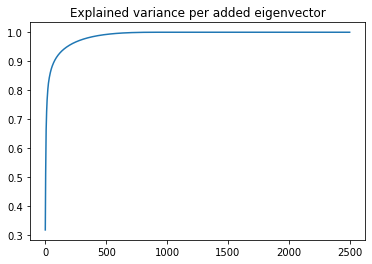

In [19]:
plt.plot(abs(np.cumsum(pca.L)/np.sum(pca.L)))
plt.title("Explained variance per added eigenvector")
plt.show()

In [20]:
import plotly.graph_objects as go
fig = go.Figure(layout=dict(title = 'PCA Transformed Data'))

for key, val in dataset.label_names.items():
    sub_dataset = dataset[dataset[:][1] == val]
    pca_transformed = pca(sub_dataset[0])
    fig.add_trace(go.Scatter3d(
        x = pca_transformed[:, 0],
        y = pca_transformed[:, 1],
        z = pca_transformed[:, 2],
        name = key,
        mode='markers'
    ))
fig.show()

In [21]:
dataset.show(0)